In [144]:
import pandas as pd

data = pd.read_csv('csv/real_data.csv')
data.drop(columns=['회사명','회계년도'], inplace=True)
data.columns=['종목코드','배당성향','연결자본','연도','시가총액','종목명','기업구분','PBR']

In [145]:
pbr_drop = data[data['PBR'] < 0.2].index
data.drop(pbr_drop, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214
...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719


In [146]:
data['배당성향'] = data['배당성향'].fillna(0)
data

,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214
...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719


In [147]:
data['1/PBR'] = data['PBR'].apply(lambda x : 'H' if x < 1 else 'L')
data


,종목코드,배당성향,연결자본,연도,시가총액,종목명,기업구분,PBR,1/PBR
0,990,0.0,835716158.0,2007,3.585737e+11,DB하이텍,B,0.429062,H
1,990,0.0,607545037.0,2009,2.668661e+11,DB하이텍,S,0.439253,H
2,990,0.0,398016157.0,2010,4.570225e+11,DB하이텍,B,1.148251,L
3,990,0.0,308061688.0,2011,3.101546e+11,DB하이텍,S,1.006794,L
4,990,0.0,290893335.0,2012,3.101546e+11,DB하이텍,S,1.066214,L
...,...,...,...,...,...,...,...,...,...
6882,3280,0.0,73148175.0,2018,7.060866e+10,흥아해운,S,0.965283,H
6883,3280,0.0,30919383.0,2019,5.392606e+10,흥아해운,S,1.744086,L
6884,3280,0.0,102939788.0,2021,6.491472e+11,흥아해운,S,6.306087,L
6885,3280,0.0,135304736.0,2022,3.257757e+11,흥아해운,S,2.407719,L


In [235]:
firm_data = data.drop(columns=['연결자본','시가총액'])
firm_data

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
0,990,0.0,2007,DB하이텍,B,0.429062,H
1,990,0.0,2009,DB하이텍,S,0.439253,H
2,990,0.0,2010,DB하이텍,B,1.148251,L
3,990,0.0,2011,DB하이텍,S,1.006794,L
4,990,0.0,2012,DB하이텍,S,1.066214,L
...,...,...,...,...,...,...,...
6882,3280,0.0,2018,흥아해운,S,0.965283,H
6883,3280,0.0,2019,흥아해운,S,1.744086,L
6884,3280,0.0,2021,흥아해운,S,6.306087,L
6885,3280,0.0,2022,흥아해운,S,2.407719,L


In [236]:
firm_data = firm_data.drop(firm_data[firm_data['배당성향'] < 0].index)
firm_data[firm_data['배당성향'] < 0]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR


In [237]:
firm_data.reset_index(drop=True, inplace=True)
firm_data.sort_values(by='배당성향', ascending=False)

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
445,4370,11174.40,2012,농심,B,0.969078,H
2054,220,6172.77,2020,유유제약,S,0.997046,H
5184,6880,5067.25,2015,신송홀딩스,S,0.676405,H
298,1570,3935.22,2007,금양,S,0.973313,H
4979,7610,2752.04,2018,선도전기,S,0.947968,H
...,...,...,...,...,...,...,...
3159,93370,0.00,2016,후성,B,4.151182,L
3160,93370,0.00,2017,후성,B,4.489259,L
3161,93370,0.00,2018,후성,B,2.798946,L
3163,93370,0.00,2020,후성,B,4.530805,L


In [240]:
firm_data['배당'] = firm_data['배당성향'].apply(lambda x : 'DL' if x <= 26 else 'DH')
firm_data

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL
1,990,0.0,2009,DB하이텍,S,0.439253,H,DL
2,990,0.0,2010,DB하이텍,B,1.148251,L,DL
3,990,0.0,2011,DB하이텍,S,1.006794,L,DL
4,990,0.0,2012,DB하이텍,S,1.066214,L,DL
...,...,...,...,...,...,...,...,...
6878,3280,0.0,2018,흥아해운,S,0.965283,H,DL
6879,3280,0.0,2019,흥아해운,S,1.744086,L,DL
6880,3280,0.0,2021,흥아해운,S,6.306087,L,DL
6881,3280,0.0,2022,흥아해운,S,2.407719,L,DL


In [276]:
firm_data[firm_data['연도'] == 2023]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
15,990,0.0,2023,DB하이텍,B,1.495192,L,DL
47,23150,0.0,2023,MH에탄올,S,0.508684,H,DL
64,2360,0.0,2023,SH에너지화학,S,0.790362,H,DL
81,9160,0.0,2023,SIMPAC,S,0.441379,H,DL
115,2710,0.0,2023,TCC스틸,B,6.557681,L,DL
...,...,...,...,...,...,...,...,...
6817,2460,0.0,2023,화성산업,S,0.298092,H,DL
6834,10660,0.0,2023,화천기계,S,0.618922,H,DL
6850,850,0.0,2023,화천기공,S,0.201507,H,DL
6867,16580,0.0,2023,환인제약,S,0.780958,H,DL


In [1089]:
firm_data[firm_data['배당'] == 'DH']

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
16,97230,74.97,2007,HJ중공업,B,3.482819,L,DH
31,23150,40.36,2007,MH에탄올,S,1.061549,L,DH
38,23150,31.95,2014,MH에탄올,S,1.039924,L,DH
40,23150,26.58,2016,MH에탄올,S,0.916776,H,DH
41,23150,40.91,2017,MH에탄올,S,0.437861,H,DH
...,...,...,...,...,...,...,...,...
6849,850,30.55,2021,화천기공,S,0.244366,H,DH
6851,16580,26.90,2007,환인제약,S,1.502215,L,DH
6852,16580,27.20,2008,환인제약,S,1.093083,L,DH
6855,16580,26.12,2011,환인제약,S,0.732312,H,DH


In [259]:
HDH = firm_data.loc[(firm_data['1/PBR'] == 'H') & (firm_data['배당'] == 'DH')].sort_values('연도')
HDL = firm_data.loc[(firm_data['1/PBR'] == 'H') & (firm_data['배당'] == 'DL')].sort_values('연도')
LDH = firm_data.loc[(firm_data['1/PBR'] == 'L') & (firm_data['배당'] == 'DH')].sort_values('연도')
LDL = firm_data.loc[(firm_data['1/PBR'] == 'L') & (firm_data['배당'] == 'DL')].sort_values('연도')

In [278]:
HDL


,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당,sell_rtn,Date
0,990,0.0,2007,DB하이텍,B,0.429062,H,DL,-0.058005,2007-01-31
1,990,0.0,2007,DB하이텍,B,0.429062,H,DL,-0.133005,2007-02-28
2,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.036932,2007-03-31
3,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.024658,2007-04-30
4,990,0.0,2007,DB하이텍,B,0.429062,H,DL,0.173797,2007-05-31
...,...,...,...,...,...,...,...,...,...,...
36543,15890,0.0,2023,태경산업,S,0.426053,H,DL,-0.094194,2023-08-31
36544,15890,0.0,2023,태경산업,S,0.426053,H,DL,0.075499,2023-09-30
36545,15890,0.0,2023,태경산업,S,0.426053,H,DL,-0.145695,2023-10-31
36546,15890,0.0,2023,태경산업,S,0.426053,H,DL,0.031008,2023-11-30


In [241]:
BDH = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['배당'] == 'DH')].sort_values('연도')
BDL = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['배당'] == 'DL')].sort_values('연도')
SDH = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['배당'] == 'DH')].sort_values('연도')
SDL = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['배당'] == 'DL')].sort_values('연도')

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
16,97230,74.97,2007,HJ중공업,B,3.482819,L,DH
4663,28050,30.00,2007,삼성엔지니어링,B,7.291219,L,DH
4679,9150,34.16,2007,삼성전기,B,1.830308,L,DH
3004,10620,27.37,2007,현대미포조선,B,1.850676,L,DH
2917,2320,78.06,2007,한진,B,0.924602,H,DH
...,...,...,...,...,...,...,...,...
2258,30000,185.10,2022,제일기획,B,2.170981,L,DH
3630,270,71.83,2022,기아,B,0.610985,H,DH
2340,13890,402.19,2022,지누스,B,1.056482,L,DH
3762,1680,34.02,2022,대상,B,0.573701,H,DH


In [151]:
BH = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['1/PBR'] == 'H')].sort_values('연도')
BL = firm_data.loc[(firm_data['기업구분'] == 'B') & (firm_data['1/PBR'] == 'L')].sort_values('연도')
SH = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['1/PBR'] == 'H')].sort_values('연도')
SL = firm_data.loc[(firm_data['기업구분'] == 'S') & (firm_data['1/PBR'] == 'L')].sort_values('연도')

BH.loc[firm_data['연도'] == 2007]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
0,990,0.00,2007,DB하이텍,B,0.429062,H
844,1520,0.00,2007,동양,B,0.465190,H
1199,70,35.40,2007,삼양홀딩스,B,0.689291,H
1344,58650,8.40,2007,세아홀딩스,B,0.312859,H
1754,670,2.10,2007,영풍,B,0.881007,H
1909,16880,159.50,2007,웅진,B,0.750818,H
2449,2020,0.00,2007,코오롱,B,0.833169,H
2665,5810,0.00,2007,풍산홀딩스,B,0.703365,H
2850,20000,12.62,2007,한섬,B,0.891699,H
474,23590,3.90,2007,다우기술,B,0.851535,H


In [152]:
BH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
0,990,0.0,2007,DB하이텍,B,0.429062,H
844,1520,0.0,2007,동양,B,0.465190,H
1199,70,35.4,2007,삼양홀딩스,B,0.689291,H
1344,58650,8.4,2007,세아홀딩스,B,0.312859,H
1754,670,2.1,2007,영풍,B,0.881007,H
...,...,...,...,...,...,...,...
4317,4000,0.0,2023,롯데정밀화학,B,0.627894,H
3930,6650,0.0,2023,대한유화,B,0.544994,H
3181,81660,0.0,2023,휠라홀딩스,B,0.920590,H
3150,4800,0.0,2023,효성,B,0.480434,H


In [242]:
BH = BH.sort_values('연도')
BH.reset_index(drop=True, inplace=True)
BL.reset_index(drop=True, inplace=True)
SH.reset_index(drop=True, inplace=True)
SL.reset_index(drop=True, inplace=True)

BDH.reset_index(drop=True, inplace=True)
BDL.reset_index(drop=True, inplace=True)
SDH.reset_index(drop=True, inplace=True)
SDL.reset_index(drop=True, inplace=True)

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당
0,97230,74.97,2007,HJ중공업,B,3.482819,L,DH
1,28050,30.00,2007,삼성엔지니어링,B,7.291219,L,DH
2,9150,34.16,2007,삼성전기,B,1.830308,L,DH
3,10620,27.37,2007,현대미포조선,B,1.850676,L,DH
4,2320,78.06,2007,한진,B,0.924602,H,DH
...,...,...,...,...,...,...,...,...
520,30000,185.10,2022,제일기획,B,2.170981,L,DH
521,270,71.83,2022,기아,B,0.610985,H,DH
522,13890,402.19,2022,지누스,B,1.056482,L,DH
523,1680,34.02,2022,대상,B,0.573701,H,DH


In [154]:
BH[BH['종목코드'] == 3090]

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR
241,3090,43.02,2013,대웅,B,0.676986,H
279,3090,37.48,2014,대웅,B,0.740791,H
339,3090,48.23,2015,대웅,B,0.794428,H
479,3090,68.33,2019,대웅,B,0.733682,H
604,3090,7.71,2022,대웅,B,0.924731,H
680,3090,0.00,2023,대웅,B,0.835630,H


In [155]:
end = pd.read_csv('csv/month_rtn_data.csv', index_col=0)
end

,종목코드,종목명,sell_rtn,연도,Date
0,5930,삼성전자,0.053459,2001,2001-01-31
1,5930,삼성전자,0.274627,2001,2001-02-28
2,5930,삼성전자,-0.154567,2001,2001-03-31
3,5930,삼성전자,0.105263,2001,2001-04-30
4,5930,삼성전자,0.147870,2001,2001-05-31
...,...,...,...,...,...
113547,30790,비케이탑스,0.000000,2023,2023-11-30
113548,30790,비케이탑스,0.000000,2023,2023-12-31
113549,30790,비케이탑스,0.000000,2024,2024-01-31
113550,30790,비케이탑스,0.000000,2024,2024-02-29


In [156]:
BH = pd.merge(BH, end, on=['종목코드','종목명', '연도'])
BL = pd.merge(BL, end, on=['종목코드','종목명', '연도'])
SH = pd.merge(SH, end, on=['종목코드','종목명', '연도'])
SL = pd.merge(SL, end, on=['종목코드','종목명', '연도'])

In [243]:
BDH = pd.merge(BDH, end, on=['종목코드','종목명','연도'])
BDL = pd.merge(BDL, end, on=['종목코드','종목명','연도'])
SDH = pd.merge(SDH, end, on=['종목코드','종목명','연도'])
SDL = pd.merge(SDL, end, on=['종목코드','종목명','연도'])

BDH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,배당,sell_rtn,Date
0,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,NaN,2007-08-31
1,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,0.093174,2007-09-30
2,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,-0.085232,2007-10-31
3,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,0.216162,2007-11-30
4,97230,74.97,2007,HJ중공업,B,3.482819,L,DH,-0.236981,2007-12-31
...,...,...,...,...,...,...,...,...,...,...
6262,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,0.012821,2022-08-31
6263,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.077758,2022-09-30
6264,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.084314,2022-10-31
6265,14820,29.58,2022,동원시스템즈,B,1.613210,L,DH,-0.007495,2022-11-30


In [260]:
HDH = pd.merge(HDH, end, on=['종목코드','종목명','연도'])
HDL = pd.merge(HDL, end, on=['종목코드','종목명','연도'])
LDH = pd.merge(LDH, end, on=['종목코드','종목명','연도'])
LDL = pd.merge(LDL, end, on=['종목코드','종목명','연도'])

In [157]:
BH

,종목코드,배당성향,연도,종목명,기업구분,PBR,1/PBR,sell_rtn,Date
0,990,0.0,2007,DB하이텍,B,0.429062,H,-0.058005,2007-01-31
1,990,0.0,2007,DB하이텍,B,0.429062,H,-0.133005,2007-02-28
2,990,0.0,2007,DB하이텍,B,0.429062,H,0.036932,2007-03-31
3,990,0.0,2007,DB하이텍,B,0.429062,H,0.024658,2007-04-30
4,990,0.0,2007,DB하이텍,B,0.429062,H,0.173797,2007-05-31
...,...,...,...,...,...,...,...,...,...
8197,4020,0.0,2023,현대제철,B,0.249834,H,0.070073,2023-08-31
8198,4020,0.0,2023,현대제철,B,0.249834,H,0.036835,2023-09-30
8199,4020,0.0,2023,현대제철,B,0.249834,H,-0.035526,2023-10-31
8200,4020,0.0,2023,현대제철,B,0.249834,H,-0.090041,2023-11-30


In [158]:
import numpy as np

# def weighted_average(group, avg_name, weight_name):
def weighted_average(group, avg_name, _name):
    d = group[avg_name]
    # w = group[weight_name]
    w = group[_name]
    try:
        # return (d * w).sum() / w.sum()
        return d.sum() / w.nunique()
    except ZeroDivisionError:
        return np.nan

In [261]:
HDH_avgRtn = HDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDH_avgRtn'})
HDL_avgRtn = HDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDL_avgRtn'})
LDH_avgRtn = LDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'LDH_avgRtn'})
LDL_avgRtn = LDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'LDL_avgRtn'})

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/359836488.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  HDH_avgRtn = HDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'HDH_avgRtn'})
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/359836488.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  HDL_avgRtn = HDL.gro

In [244]:
BDH_avgRtn = BDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDH_avgRtn'})
BDL_avgRtn = BDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDL_avgRtn'})
SDH_avgRtn = SDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SDH_avgRtn'})
SDL_avgRtn = SDL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SDL_avgRtn'})

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/1693614487.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BDH_avgRtn = BDH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BDH_avgRtn'})
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/1693614487.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BDL_avgRtn = BDL.g

In [159]:
# 날짜별 평균치

BH_avgRtn = BH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BH_avgRtn'})
BL_avgRtn = BL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BL_avgRtn'})
SH_avgRtn = SH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SH_avgRtn'})
SL_avgRtn = SL.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'SL_avgRtn'})

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/3061062199.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BH_avgRtn = BH.groupby(['Date']).apply(weighted_average, 'sell_rtn', '종목명').to_frame().reset_index().rename(columns={0:'BH_avgRtn'})
/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/3061062199.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  BL_avgRtn = BL.groupb

In [262]:
from functools import reduce

avgRtn_list = [BH_avgRtn, BL_avgRtn, SH_avgRtn, SL_avgRtn, BDH_avgRtn, BDL_avgRtn, SDH_avgRtn, SDL_avgRtn, HDH_avgRtn, HDL_avgRtn, LDH_avgRtn, LDL_avgRtn]
avgRtn = reduce(lambda left, right: pd.merge(left, right, on='Date'), avgRtn_list)
# pd.merge([BH_pbr_avgRtn, BL_pbr_avgRtn, SH_pbr_avgRtn, SL_pbr_avgRtn], on='Date',axis=1)
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn
0,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916
1,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050
2,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154
3,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985
4,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068


In [263]:
avgRtn['Date'] = pd.to_datetime(avgRtn['Date'], format='%Y-%m-%d')
avgRtn['Date']

0     2007-01-31
1     2007-02-28
2     2007-03-31
3     2007-04-30
4     2007-05-31
         ...    
187   2022-08-31
188   2022-09-30
189   2022-10-31
190   2022-11-30
191   2022-12-31
Name: Date, Length: 192, dtype: datetime64[ns]

In [264]:
avgRtn = avgRtn.set_index(avgRtn['Date']).drop(columns='Date')
avgRtn['연도'] = avgRtn.index.year
avgRtn

,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
Date,,,,,,,,,,,,,
2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022


In [265]:
avgRtn.reset_index(inplace=True)
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
0,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
1,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
3,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
4,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022


In [266]:
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도
0,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007
1,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007
2,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007
3,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007
4,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022


In [267]:
smb = []
hml = []
dhmdl = []

for i in avgRtn.index :
    SMB = ((avgRtn.loc[i]['SH_avgRtn']) + (avgRtn.loc[i]['SL_avgRtn'])) - ((avgRtn.loc[i]['BH_avgRtn']) + (avgRtn.loc[i]['BL_avgRtn'])) / 2
    smb.append(SMB)
    HML = ((avgRtn.loc[i]['SH_avgRtn']) + (avgRtn.loc[i]['BH_avgRtn'])) - ((avgRtn.loc[i]['SL_avgRtn']) + (avgRtn.loc[i]['BL_avgRtn'])) / 2
    hml.append(HML)
    DHMDL = ((avgRtn.loc[i]['SDH_avgRtn']) + (avgRtn.loc[i]['BDH_avgRtn'])) - ((avgRtn.loc[i]['SDL_avgRtn']) + (avgRtn.loc[i]['BDL_avgRtn'])) / 2
    dhmdl.append(DHMDL)
    

avgRtn['SMB'] = smb
avgRtn['HML'] = hml
avgRtn['DHMDL'] = dhmdl

avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,HDH_avgRtn,HDL_avgRtn,LDH_avgRtn,LDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007,-0.034305,-0.031635,-0.010314
1,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007,-0.019418,-0.062759,-0.062150
2,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007,0.094834,0.003281,0.023420
3,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007,0.099334,0.082170,0.111754
4,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022,0.111640,0.003808,0.004452
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022,-0.045377,-0.014133,0.012852
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022,-0.003444,-0.001288,-0.001569


In [271]:
avgRtn.columns = ['Date', 'BH_avgRtn', 'BL_avgRtn', 'SH_avgRtn', 'SL_avgRtn',
       'BDH_avgRtn', 'BDL_avgRtn', 'SDH_avgRtn', 'SDL_avgRtn', 'PHDH_avgRtn',
       'PHDL_avgRtn', 'PLDH_avgRtn', 'PLDL_avgRtn', '연도', 'SMB', 'HML', 'DHMDL']
avgRtn

,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007,-0.034305,-0.031635,-0.010314
1,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007,-0.019418,-0.062759,-0.062150
2,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007,0.094834,0.003281,0.023420
3,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007,0.099334,0.082170,0.111754
4,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022,0.111640,0.003808,0.004452
188,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022,-0.045377,-0.014133,0.012852
189,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,0.020925,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022,-0.003444,-0.001288,-0.001569


In [268]:
# avgRtn.drop(columns='index', inplace=True)
# avgRtn

KeyError: "['index'] not found in axis"

In [165]:
avgRtn.to_csv('csv/avgRtn.csv')

In [166]:
rf = pd.read_csv('csv/mkt_rf.csv', index_col=0)
rf

,Date,mkt_rtn,rf
0,2001-02-28,-0.064427,-0.012259
1,2001-03-31,-0.094932,0.085106
2,2001-04-30,0.103475,0.031046
3,2001-05-31,0.060274,-0.072900
4,2001-06-30,-0.027819,-0.020513
...,...,...,...
270,2023-08-31,-0.028987,-0.006529
271,2023-09-30,-0.035677,0.046000
272,2023-10-31,-0.075892,0.021579
273,2023-11-30,0.112950,-0.023262


In [167]:
rf['rm_rf'] = rf['mkt_rtn'] - rf['rf']
rf

,Date,mkt_rtn,rf,rm_rf
0,2001-02-28,-0.064427,-0.012259,-0.052168
1,2001-03-31,-0.094932,0.085106,-0.180038
2,2001-04-30,0.103475,0.031046,0.072429
3,2001-05-31,0.060274,-0.072900,0.133174
4,2001-06-30,-0.027819,-0.020513,-0.007307
...,...,...,...,...
270,2023-08-31,-0.028987,-0.006529,-0.022458
271,2023-09-30,-0.035677,0.046000,-0.081677
272,2023-10-31,-0.075892,0.021579,-0.097471
273,2023-11-30,0.112950,-0.023262,0.136213


In [168]:
rf_df = rf[71:].reset_index(drop=True)
rf_df

,Date,mkt_rtn,rf,rm_rf
0,2007-01-31,-0.051748,0.014141,-0.065889
1,2007-02-28,0.041986,-0.015936,0.057922
2,2007-03-31,0.024842,-0.014170,0.039012
3,2007-04-30,0.061747,0.043121,0.018625
4,2007-05-31,0.102883,0.001969,0.100914
...,...,...,...,...
199,2023-08-31,-0.028987,-0.006529,-0.022458
200,2023-09-30,-0.035677,0.046000,-0.081677
201,2023-10-31,-0.075892,0.021579,-0.097471
202,2023-11-30,0.112950,-0.023262,0.136213


In [169]:
#avgRtn.set_index('Date',inplace=True)
#rf_df.set_index('Date',inplace=True)

In [303]:
datalist = [rf_df,avgRtn]
all_data= pd.concat(datalist, axis=1)
all_data.dropna(inplace=True)


,Date,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.051748,0.014141,-0.065889,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,...,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007.0,-0.034305,-0.031635,-0.010314
1,2007-02-28,0.041986,-0.015936,0.057922,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,...,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007.0,-0.019418,-0.062759,-0.062150
2,2007-03-31,0.024842,-0.014170,0.039012,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,...,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007.0,0.094834,0.003281,0.023420
3,2007-04-30,0.061747,0.043121,0.018625,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,...,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007.0,0.099334,0.082170,0.111754
4,2007-05-31,0.102883,0.001969,0.100914,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,...,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007.0,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.008383,0.126120,-0.117737,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,...,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022.0,0.111640,0.003808,0.004452
188,2022-09-30,-0.128056,0.034884,-0.162939,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,...,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022.0,-0.045377,-0.014133,0.012852
189,2022-10-31,0.064078,0.118569,-0.054491,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,...,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022.0,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.078008,-0.015332,0.093340,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,...,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022.0,-0.003444,-0.001288,-0.001569


In [307]:
all_data.columns = ['날짜', 'mkt_rtn', 'rf', 'rm_rf', 'Date', 'BH_avgRtn', 'BL_avgRtn',
       'SH_avgRtn', 'SL_avgRtn', 'BDH_avgRtn', 'BDL_avgRtn', 'SDH_avgRtn',
       'SDL_avgRtn', 'PHDH_avgRtn', 'PHDL_avgRtn', 'PLDH_avgRtn',
       'PLDL_avgRtn', '연도', 'SMB', 'HML', 'DHMDL']

In [539]:
def g_mean(_x) :
    a = np.log(_x)
    return np.exp(a.mean())

g_mean([-0.02820751,  0.06880354,  0.03745351, -0.08459434, -0.05734984,
       -0.10489524,  0.05408061, -0.28296903, -0.0462922 ,  0.15128301,
        0.01789377, -0.13712318])

/var/folders/lj/ms0l79910fz22cg2hchczhw40000gn/T/ipykernel_99995/2315956279.py:2: RuntimeWarning: invalid value encountered in log
  a = np.log(_x)


nan

In [540]:
def calculate_geometric_mean(returns):
    # 월별 수익률을 연간 수익률로 변환하여 기하평균을 계산
    annual_returns = [1 + r for r in returns]
    geometric_mean = np.prod(annual_returns) ** (1 / len(annual_returns)) - 1
    return geometric_mean

In [726]:
# t = pd.DataFrame()

# # t['rm_rf'] = calculate_geometric_mean(all_data_list['rm_rf'].values)
# # t['SMB'] = calculate_geometric_mean(all_data_list['SMB'].values)
# # t['HML'] = calculate_geometric_mean(all_data_list['HML'].values)
# # t['DHMDL'] = calculate_geometric_mean(all_data_list['DHMDL'].values)
# t['PHDH_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)
# t['PHDL_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)
# t['PLDH_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)
# t['PLDL_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)


t

,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn


In [ ]:
# t = []

# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
# t.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))

In [1054]:
# rm = []
# smb = []
# hml = []
# dhmdl = []
# phdhavg = []
# phdlavg = []
# pldhavg = []
# pldlavg = []
# rm.append(calculate_geometric_mean(all_data_list['rm_rf'].values))
# smb.append(calculate_geometric_mean(all_data_list['SMB'].values))
# hml.append(calculate_geometric_mean(all_data_list['HML'].values))
# dhmdl.append(calculate_geometric_mean(all_data_list['DHMDL'].values))
phdhavg.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))
phdlavg.append(calculate_geometric_mean(all_data_list['PHDL_avgRtn'].values))
pldhavg.append(calculate_geometric_mean(all_data_list['PLDH_avgRtn'].values))
pldlavg.append(calculate_geometric_mean(all_data_list['PLDL_avgRtn'].values))




In [1055]:
phdhavg

[-0.034479561056842245,
 0.017134325111909154,
 0.0030345539234588603,
 0.0026574266726544504,
 -0.01100567082863868,
 0.011042599984168122]

In [1056]:
# t['rm_rf'] = rm
# t['SMB'] = smb
# t['HML'] = hml
# t['DHMDL'] = dhmdl

average = pd.DataFrame()

average['연도'] = ['2008', '2009-2011', '2012', '2013-2017', '2018-2019', '2020-2021']
average['경기국면'] = ['수축기', '확장기','수축기','확장기','수축기','확장기']
average['PHDH_avgRtn'] = phdhavg
average['PHDL_avgRtn'] = phdlavg
average['PLDH_avgRtn'] = pldhavg
average['PLDL_avgRtn'] = pldlavg

average

,연도,경기국면,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn
0,2008,수축기,-0.034480,-0.041466,-0.020111,-0.013938
1,2009-2011,확장기,0.017134,0.022094,0.033302,0.033663
2,2012,수축기,0.003035,0.009883,0.011961,0.000806
3,2013-2017,확장기,0.002657,0.002894,0.017896,0.022141
4,2018-2019,수축기,-0.011006,-0.013464,0.000497,0.006669
5,2020-2021,확장기,0.011043,0.018887,0.030342,0.032235


In [749]:
average.to_csv('csv/average.csv')

In [537]:
all_data_list['BH_avgRtn'].values

array([-0.02820751,  0.06880354,  0.03745351, -0.08459434, -0.05734984,
       -0.10489524,  0.05408061, -0.28296903, -0.0462922 ,  0.15128301,
        0.01789377, -0.13712318])

In [1053]:
all_data_list = all_data[(all_data["Date"] >= "2020-04-30")  & (all_data["Date"] <="2022-03-31") ]
all_data_list

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
159,2020-04-30,0.109949,-0.118301,0.228250,2020-04-30,-0.183436,-0.022265,-0.168918,-0.142481,-0.114697,...,-0.138138,-0.165613,-0.166318,-0.174184,-0.068030,-0.118013,2020.0,-0.208548,-0.269981,-0.135785
160,2020-05-31,0.042124,-0.206422,0.248546,2020-05-31,0.194197,0.162674,0.212041,0.234205,0.163173,...,0.213741,0.223941,0.201795,0.213016,0.192163,0.218930,2020.0,0.267811,0.207798,0.173176
161,2020-06-30,0.038791,0.034682,0.004109,2020-06-30,0.073766,0.132128,0.063783,0.091174,0.119805,...,0.056967,0.081867,0.058596,0.069288,0.107339,0.102427,2020.0,0.052009,0.025898,0.085253
162,2020-07-31,0.066897,-0.081006,0.147902,2020-07-31,-0.026974,0.012379,-0.044208,-0.016222,0.017190,...,-0.037722,-0.030826,-0.030737,-0.047130,-0.003618,-0.008781,2020.0,-0.053133,-0.069260,0.003540
163,2020-08-31,0.034143,0.097264,-0.063122,2020-08-31,0.041297,0.130794,0.071612,0.115886,0.129077,...,0.089688,0.089824,0.065505,0.067007,0.166190,0.105891,2020.0,0.101453,-0.010431,0.137968
164,2020-09-30,0.000739,-0.074792,0.075532,2020-09-30,0.062497,0.102970,0.012888,0.033580,0.055561,...,0.012068,0.024910,0.015609,0.024454,0.042631,0.058465,2020.0,-0.036265,0.007110,0.001357
165,2020-10-31,-0.026092,0.017964,-0.044056,2020-10-31,0.037567,-0.013164,0.022135,0.048850,0.012411,...,0.013104,0.040674,0.019494,0.027664,0.001126,0.039184,2020.0,0.058783,0.041859,0.003303
166,2020-11-30,0.142995,0.052941,0.090053,2020-11-30,-0.006426,-0.036936,-0.009897,-0.007056,-0.014559,...,-0.028928,-0.001082,-0.021016,-0.002822,-0.030848,-0.011460,2020.0,0.004727,0.005673,-0.027213
167,2020-12-31,0.108874,0.034916,0.073958,2020-12-31,0.160996,0.167070,0.088320,0.160903,0.108785,...,0.107750,0.122040,0.083052,0.110390,0.152655,0.165994,2020.0,0.085190,0.085329,0.054724
168,2021-01-31,0.035755,-0.095816,0.131571,2021-01-31,0.099779,0.131634,0.031364,0.069550,0.088991,...,0.048286,0.048160,0.038617,0.045442,0.095442,0.085487,2021.0,-0.014792,0.030551,0.045141


In [1031]:
all_data_roll = all_data_list[['rm_rf','SMB','HML','DHMDL','PLDL_avgRtn']]
all_data_roll.reset_index(drop=True,inplace=True)


In [1032]:
all_data_roll

,rm_rf,SMB,HML,DHMDL,PLDL_avgRtn
0,0.228250,-0.208548,-0.269981,-0.135785,-0.118013
1,0.248546,0.267811,0.207798,0.173176,0.218930
2,0.004109,0.052009,0.025898,0.085253,0.102427
3,0.147902,-0.053133,-0.069260,0.003540,-0.008781
4,-0.063122,0.101453,-0.010431,0.137968,0.105891
5,0.075532,-0.036265,0.007110,0.001357,0.058465
6,-0.044056,0.058783,0.041859,0.003303,0.039184
7,0.090053,0.004727,0.005673,-0.027213,-0.011460
8,0.073958,0.085190,0.085329,0.054724,0.165994
9,0.131571,-0.014792,0.030551,0.045141,0.085487


In [1033]:
X = all_data_roll.drop('PLDL_avgRtn', axis=1)
y = all_data_roll['PLDL_avgRtn']

In [1034]:
X

,rm_rf,SMB,HML,DHMDL
0,0.228250,-0.208548,-0.269981,-0.135785
1,0.248546,0.267811,0.207798,0.173176
2,0.004109,0.052009,0.025898,0.085253
3,0.147902,-0.053133,-0.069260,0.003540
4,-0.063122,0.101453,-0.010431,0.137968
5,0.075532,-0.036265,0.007110,0.001357
6,-0.044056,0.058783,0.041859,0.003303
7,0.090053,0.004727,0.005673,-0.027213
8,0.073958,0.085190,0.085329,0.054724
9,0.131571,-0.014792,0.030551,0.045141


In [1035]:
y

0    -0.118013
1     0.218930
2     0.102427
3    -0.008781
4     0.105891
5     0.058465
6     0.039184
7    -0.011460
8     0.165994
9     0.085487
10    0.029284
11    0.018533
12    0.035078
13    0.071830
14    0.072357
15    0.087148
16   -0.018417
17   -0.004465
18   -0.013035
19   -0.009865
20   -0.097693
21    0.094756
22   -0.105260
23    0.046516
Name: PLDL_avgRtn, dtype: float64

In [1037]:
import statsmodels.api as sm

feature_add = sm.add_constant(X, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PLDL_avgRtn   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     15.70
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           7.85e-06
Time:                        09:35:59   Log-Likelihood:                 44.638
No. Observations:                  24   AIC:                            -79.28
Df Residuals:                      19   BIC:                            -73.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.009      2.239      0.037       0.001       0.040
rm_rf         -0.0015      0.055     -0.027      0.979      -0.117       0.114
SMB            0.3684      0.211      1.749      0.096      -0.072       0.809
HML            0.0835      0.193      0.432      0.671      -0.321       0.488
DHMDL          0.4765      0.232      2.055      0.054      -0.009       0.962
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.135
Skew:                          -0.135   Prob(JB):                        0.935
Kurtosis:                       3.250   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [750]:
all_data_list = all_data[(all_data["Date"] >= "2008-04-30")  & (all_data["Date"] <="2009-03-31") ]
all_data_list

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
15,2008-04-30,0.071291,-0.031311,0.102603,2008-04-30,-0.028208,0.016997,-0.029096,-0.030034,0.024824,...,-0.025284,-0.030156,-0.016659,-0.031997,0.012339,-0.008277,2008.0,-0.053524,-0.050785,0.024244
16,2008-05-31,0.014544,0.024242,-0.009698,2008-05-31,0.068804,0.131277,0.045382,0.066803,0.041481,...,0.037254,0.050404,0.028040,0.054826,0.069260,0.117234,2008.0,0.012145,0.015146,-0.005285
17,2008-06-30,-0.095625,0.055227,-0.150852,2008-06-30,0.037454,0.030992,0.027142,0.046811,-0.015151,...,0.015154,0.032854,0.014668,0.032504,-0.021318,0.059448,2008.0,0.039730,0.025694,-0.042668
18,2008-07-31,-0.047913,0.009346,-0.057259,2008-07-31,-0.084594,-0.037569,-0.052580,-0.034547,-0.041010,...,-0.037626,-0.053646,-0.038677,-0.063095,-0.038809,-0.035375,2008.0,-0.026045,-0.101116,-0.016177
19,2008-08-31,-0.075520,0.007407,-0.082928,2008-08-31,-0.057350,-0.046346,-0.063428,-0.048910,-0.080035,...,-0.060850,-0.061997,-0.067193,-0.061154,-0.066437,-0.040377,2008.0,-0.060490,-0.073150,-0.088643
20,2008-09-30,-0.017758,0.020221,-0.037979,2008-09-30,-0.104895,-0.090904,-0.126240,-0.151770,-0.094285,...,-0.081830,-0.140602,-0.083419,-0.132086,-0.092790,-0.125147,2008.0,-0.180111,-0.109799,-0.055769
21,2008-10-31,-0.231344,-0.117117,-0.114227,2008-10-31,0.054081,-0.030629,0.007090,0.037005,-0.006684,...,0.007901,0.011128,0.022937,0.013577,-0.053934,0.016830,2008.0,0.032369,0.057982,-0.016220
22,2008-11-30,-0.033233,-0.004082,-0.029151,2008-11-30,-0.282969,-0.199998,-0.265582,-0.255967,-0.187930,...,-0.222806,-0.274573,-0.237986,-0.276240,-0.135189,-0.256131,2008.0,-0.280065,-0.320569,-0.140479
23,2008-12-31,0.044979,-0.331967,0.376946,2008-12-31,-0.046292,0.029753,-0.040631,0.011532,-0.029177,...,-0.023550,-0.037381,-0.030365,-0.044418,-0.010820,0.034320,2008.0,-0.020830,-0.107566,-0.031191
24,2009-01-31,0.033474,-0.223926,0.257400,2009-01-31,0.151283,0.113721,0.094708,0.112055,0.083884,...,0.054767,0.107529,0.057111,0.112074,0.069141,0.122641,2009.0,0.074261,0.133103,0.016232


In [577]:
t = pd.DataFrame()

t['rm_rf'] = calculate_geometric_mean(all_data_list['rm_rf'].values)
t['SMB'] = calculate_geometric_mean(all_data_list['SMB'].values)
t['HML'] = calculate_geometric_mean(all_data_list['HML'].values)
t['DHMDL'] = calculate_geometric_mean(all_data_list['DHMDL'].values)
t['PHDH_avgRtn'] = calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values)

In [578]:
rm = []
smb = []
hml = []
dhmdl = []
phdhavg = []
rm.append(calculate_geometric_mean(all_data_list['rm_rf'].values))
smb.append(calculate_geometric_mean(all_data_list['SMB'].values))
hml.append(calculate_geometric_mean(all_data_list['HML'].values))
dhmdl.append(calculate_geometric_mean(all_data_list['DHMDL'].values))
phdhavg.append(calculate_geometric_mean(all_data_list['PHDH_avgRtn'].values))

In [579]:
t['rm_rf'] = rm
t['SMB'] = smb
t['HML'] = hml
t['DHMDL'] = dhmdl
t['PHDH_avgRtn'] = phdhavg

t

,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
0,-0.007733,-0.050241,-0.068252,-0.038708,-0.042916


In [583]:
X = t.drop('PHDH_avgRtn', axis=1)
y = t['PHDH_avgRtn']

In [584]:
import statsmodels.api as sm

feature_add = sm.add_constant(X, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PHDH_avgRtn   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Mar 2024   Prob (F-statistic):                nan
Time:                        19:50:39   Log-Likelihood:                 68.541
No. Observations:                   2   AIC:                            -133.1
Df Residuals:                       0   BIC:                            -135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012        inf         -0        nan         nan         nan
rm_rf          0.2422        inf          0        nan         nan         nan
SMB            0.2525        inf          0        nan         nan         nan
HML            0.2568        inf          0        nan         nan         nan
DHMDL          0.2497        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.246
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [1058]:
all_data

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.051748,0.014141,-0.065889,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,...,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007.0,-0.034305,-0.031635,-0.010314
1,2007-02-28,0.041986,-0.015936,0.057922,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,...,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007.0,-0.019418,-0.062759,-0.062150
2,2007-03-31,0.024842,-0.014170,0.039012,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,...,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007.0,0.094834,0.003281,0.023420
3,2007-04-30,0.061747,0.043121,0.018625,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,...,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007.0,0.099334,0.082170,0.111754
4,2007-05-31,0.102883,0.001969,0.100914,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,...,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007.0,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.008383,0.126120,-0.117737,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,...,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022.0,0.111640,0.003808,0.004452
188,2022-09-30,-0.128056,0.034884,-0.162939,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,...,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022.0,-0.045377,-0.014133,0.012852
189,2022-10-31,0.064078,0.118569,-0.054491,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,...,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022.0,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.078008,-0.015332,0.093340,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,...,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022.0,-0.003444,-0.001288,-0.001569


In [1066]:
all_data['SDL_avgRtn'].mean()

0.0118763250967939

In [1087]:
calculate_geometric_mean(all_data['PLDL_avgRtn'].values)

0.01926844631170166

In [1077]:
pd.read_excel('csv/회귀분석결과표.xlsx')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"종속변수의 월평균 수익률을 시장초과수익률, 사이즈와 BE/ME팩터의 모방수익률(SMB와 HML), BE/ME팩터와 배당성향 팩터의 월평균 수익률로 회귀분석한 결과:2008년 4월부터 22년 3월까지, 168개 관측치",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PHDH(저PBR+고배당성향),NaN,NaN,NaN,PHDL(저PBR+저배당성향),NaN,NaN,NaN,PLDH(고PBR+고배당성향),NaN,NaN,NaN,PLDL(고PBR+저배당성향),NaN,NaN,NaN
2,NaN,NaN,NaN,회귀계수,Rm-Rf,SMB,HML,DHMDL,Rm-Rf,SMB,HML,DHMDL,Rm-Rf,SMB,HML,DHMDL,Rm-Rf,SMB,HML,DHMDL
3,NaN,설명변수:,종속변수 그룹:,2008(2008.04-2009.03),0.0015,0.2659,0.3039,0.4151,0.05,0.36,0.53,0.09,0.055,0.255,-0.007,0.708,0.1076,0.4565,0.4256,0.1157
4,NaN,NaN,NaN,2009(2009.04-2010.03),0.0409,0.3643,0.0667,0.5399,0.03,0.39,0.47,0.14,0.046,0.157,0.136,0.935,0.034,0.5073,0.1809,0.3832
5,NaN,Rm-Rf : 시장초과수익률,PHDH(저PBR+고배당성향),2010(2010.04-2011.03),-0.0126,0.307,0.3492,0.2904,-0.02,0.22,0.63,-0.01,0.0148,0.0616,-0.198,0.7858,-0.0471,0.1365,0.1544,0.4342
6,NaN,SMB : 사이즈 효과를 위한 월평균 수익률,PHDL(저PBR+저배당성향),2011(2011.04-2012.03),-0.0669,0.2244,0.4233,0.2709,0.24,0.26,0.49,0.26,0.7501,-0.0314,-0.3448,1.4013,0.3976,0.1049,0.2234,0.6804
7,NaN,"HML : BE/ME(PBR역수),가치주 효과를 위한 월평균수익률",PLDH(고PBR+고배당성향),2012(2012.04-2013.03),0.0517,0.1791,0.452,0.1059,0.05,0.36,0.55,-0.095,0.1122,0.138,0.0351,0.6619,0.2988,0.4141,0.3813,-0.3487
8,NaN,DHMDL : 배당성향 효과를 위한 월평균 수익률,PLDL(고PBR+저배당성향),2013(2013.04-2014.03),0.0681,0.2267,0.3029,0.4594,-0.07,0.36,0.57,-0.065,0.0374,0.2267,-0.0039,0.642,-0.0346,0.5456,0.3204,-0.0511
9,NaN,NaN,NaN,2014(2014.04-2015.03),0.0053,0.1804,0.3387,0.3559,-0.03,0.41,0.5,-0.05,-0.0394,0.3086,-0.0448,0.5936,0.0269,0.5561,0.0303,0.1081


In [1095]:
all_data

,날짜,mkt_rtn,rf,rm_rf,Date,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,...,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
0,2007-01-31,-0.051748,0.014141,-0.065889,2007-01-31,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,...,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007.0,-0.034305,-0.031635,-0.010314
1,2007-02-28,0.041986,-0.015936,0.057922,2007-02-28,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,...,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007.0,-0.019418,-0.062759,-0.062150
2,2007-03-31,0.024842,-0.014170,0.039012,2007-03-31,0.011695,0.038785,0.047344,0.072730,0.031440,...,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007.0,0.094834,0.003281,0.023420
3,2007-04-30,0.061747,0.043121,0.018625,2007-04-30,0.072345,0.063045,0.083241,0.083787,0.067332,...,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007.0,0.099334,0.082170,0.111754
4,2007-05-31,0.102883,0.001969,0.100914,2007-05-31,0.162974,0.121004,0.101656,0.062188,0.109713,...,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007.0,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2022-08-31,0.008383,0.126120,-0.117737,2022-08-31,0.019775,0.067486,0.063608,0.091663,0.015188,...,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022.0,0.111640,0.003808,0.004452
188,2022-09-30,-0.128056,0.034884,-0.162939,2022-09-30,0.005676,0.019265,-0.017753,-0.015154,0.005298,...,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022.0,-0.045377,-0.014133,0.012852
189,2022-10-31,0.064078,0.118569,-0.054491,2022-10-31,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,...,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022.0,-0.155481,-0.106264,-0.033329
190,2022-11-30,0.078008,-0.015332,0.093340,2022-11-30,0.006923,0.026147,0.007606,0.005486,0.008800,...,0.004158,0.008130,-0.000967,0.011480,0.023366,0.010068,2022.0,-0.003444,-0.001288,-0.001569


In [1173]:
h = all_data[['Date','rm_rf','SMB','HML','DHMDL','PHDH_avgRtn']]
h

,Date,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
0,2007-01-31,-0.065889,-0.034305,-0.031635,-0.010314,-0.030158
1,2007-02-28,0.057922,-0.019418,-0.062759,-0.062150,-0.054661
2,2007-03-31,0.039012,0.094834,0.003281,0.023420,0.029142
3,2007-04-30,0.018625,0.099334,0.082170,0.111754,0.097734
4,2007-05-31,0.100914,0.021855,0.173034,0.045681,0.069759
...,...,...,...,...,...,...
187,2022-08-31,-0.117737,0.111640,0.003808,0.004452,0.050720
188,2022-09-30,-0.162939,-0.045377,-0.014133,0.012852,-0.001733
189,2022-10-31,-0.054491,-0.155481,-0.106264,-0.033329,-0.087331
190,2022-11-30,0.093340,-0.003444,-0.001288,-0.001569,-0.000967


In [1116]:
X = h.iloc[:, :-1].values
y = h.iloc[:, -1].values
X

array([[-6.58890979e-02, -3.43051873e-02, -3.16347332e-02,
        -1.03141905e-02],
       [ 5.79217914e-02, -1.94183246e-02, -6.27586359e-02,
        -6.21499590e-02],
       [ 3.90124099e-02,  9.48335974e-02,  3.28120258e-03,
         2.34198836e-02],
       [ 1.86253913e-02,  9.93335485e-02,  8.21699268e-02,
         1.11754212e-01],
       [ 1.00914345e-01,  2.18551853e-02,  1.73033936e-01,
         4.56805279e-02],
       [ 5.45192934e-03,  2.26700460e-01,  8.40942068e-02,
         1.04223882e-01],
       [ 9.72200167e-02,  2.01291191e-02,  5.42070974e-02,
         5.77393411e-02],
       [-5.77176987e-02,  4.74992752e-02,  8.78686982e-02,
         5.78084103e-02],
       [ 3.53874532e-02,  1.10215331e-02, -6.47897700e-02,
        -8.94612341e-03],
       [ 7.74482585e-02, -1.42945232e-02,  5.67373776e-03,
         4.56822281e-02],
       [-1.07005759e-01, -2.03782201e-01, -1.03938091e-01,
         5.17482337e-02],
       [-3.93252554e-02, -1.28819130e-02, -1.49811634e-01,
      

In [1132]:
h.iloc[: ,0]

0     -0.065889
1      0.057922
2      0.039012
3      0.018625
4      0.100914
         ...   
187   -0.117737
188   -0.162939
189   -0.054491
190    0.093340
191   -0.108387
Name: rm_rf, Length: 192, dtype: float64

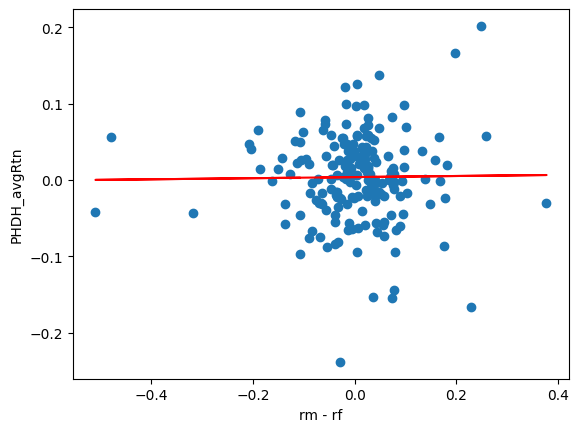

In [1142]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = h.iloc[:, 0].values
y = h.iloc[:, -1].values

X = X.reshape(-1,1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
y_pred = model.predict(X)
plt.scatter(X, y)
plt.xlabel('rm - rf')
plt.ylabel('PHDH_avgRtn')
plt.plot(X, y_pred, color='red')
plt.show()

In [1174]:
h

,Date,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
0,2007-01-31,-0.065889,-0.034305,-0.031635,-0.010314,-0.030158
1,2007-02-28,0.057922,-0.019418,-0.062759,-0.062150,-0.054661
2,2007-03-31,0.039012,0.094834,0.003281,0.023420,0.029142
3,2007-04-30,0.018625,0.099334,0.082170,0.111754,0.097734
4,2007-05-31,0.100914,0.021855,0.173034,0.045681,0.069759
...,...,...,...,...,...,...
187,2022-08-31,-0.117737,0.111640,0.003808,0.004452,0.050720
188,2022-09-30,-0.162939,-0.045377,-0.014133,0.012852,-0.001733
189,2022-10-31,-0.054491,-0.155481,-0.106264,-0.033329,-0.087331
190,2022-11-30,0.093340,-0.003444,-0.001288,-0.001569,-0.000967


In [1175]:
h2008 = h[(h["Date"] >= "2008-04-30")  & (h["Date"] <="2009-03-31") ]
h2009_2011 = h[(h["Date"] >= "2009-04-30")  & (h["Date"] <="2012-03-31") ]
h2012 = h[(h["Date"] >= "2012-04-30")  & (h["Date"] <="2013-03-31") ]
h2013_2017 = h[(h["Date"] >= "2013-04-30")  & (h["Date"] <="2018-03-31") ]
h2018_2019 = h[(h["Date"] >= "2018-04-30")  & (h["Date"] <="2020-03-31") ]
h2020_2021 = h[(h["Date"] >= "2020-04-30")  & (h["Date"] <="2022-03-31") ]


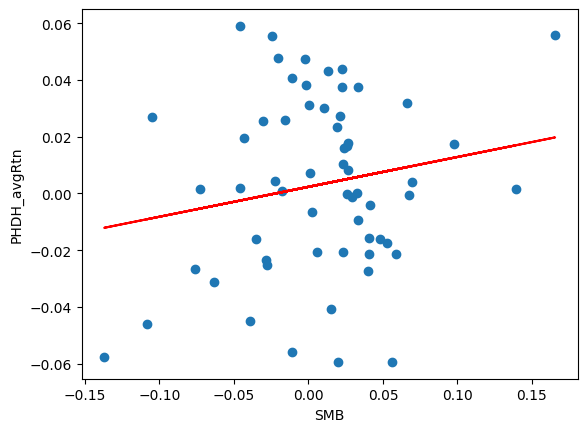

In [1157]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

h = h2013_2017.drop(columns='Date')

X = h2013_2017.iloc[:, 1].values
y = h2013_2017.iloc[:, -1].values

X = X.reshape(-1,1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
y_pred = model.predict(X)
# plt.title('2008년도 기준')
plt.scatter(X, y)
plt.xlabel('SMB')
plt.ylabel('PHDH_avgRtn')
plt.plot(X, y_pred, color='red')
plt.show()

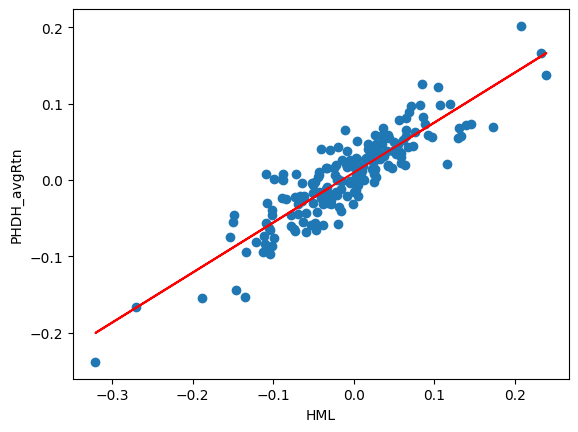

In [1145]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = h.iloc[:, 2].values
y = h.iloc[:, -1].values

X = X.reshape(-1,1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
y_pred = model.predict(X)
plt.scatter(X, y)
plt.xlabel('HML')
plt.ylabel('PHDH_avgRtn')
plt.plot(X, y_pred, color='red')
plt.show()

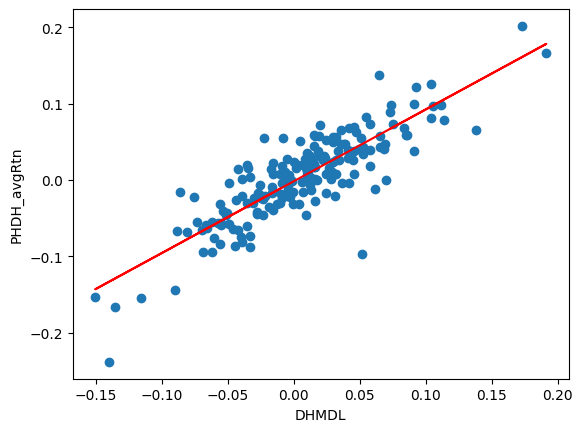

In [1146]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = h.iloc[:, 3].values
y = h.iloc[:, -1].values

X = X.reshape(-1,1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
y_pred = model.predict(X)
plt.scatter(X, y)
plt.xlabel('DHMDL')
plt.ylabel('PHDH_avgRtn')
plt.plot(X, y_pred, color='red')
plt.show()

In [1144]:
h

,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
0,-0.065889,-0.034305,-0.031635,-0.010314,-0.030158
1,0.057922,-0.019418,-0.062759,-0.062150,-0.054661
2,0.039012,0.094834,0.003281,0.023420,0.029142
3,0.018625,0.099334,0.082170,0.111754,0.097734
4,0.100914,0.021855,0.173034,0.045681,0.069759
...,...,...,...,...,...
187,-0.117737,0.111640,0.003808,0.004452,0.050720
188,-0.162939,-0.045377,-0.014133,0.012852,-0.001733
189,-0.054491,-0.155481,-0.106264,-0.033329,-0.087331
190,0.093340,-0.003444,-0.001288,-0.001569,-0.000967


In [1128]:
y_pred = model.predict(X)
type(y_pred)

numpy.ndarray

In [1129]:
type(X)

numpy.ndarray

ValueError: x and y must be the same size

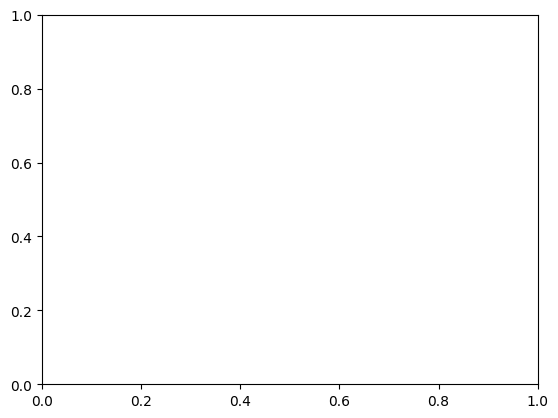

In [1130]:
plt.scatter(X, y)

In [1119]:
h.columns

Index(['rm_rf', 'SMB', 'HML', 'DHMDL', 'PHDH_avgRtn'], dtype='object')

In [1154]:
h2009_2012 = h[(h["Date"] >= "2009-04-30")  & (h["Date"] <="2011-03-31") ]
h2009_2012

,Date,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
27,2009-04-30,0.198174,0.158625,0.232636,0.191281,0.166027
28,2009-05-31,0.047042,0.263029,0.238890,0.064563,0.137203
29,2009-06-30,-0.203356,0.091582,-0.040780,0.068285,0.041136
30,2009-07-31,0.177923,-0.045988,-0.040210,-0.030030,-0.023791
31,2009-08-31,-0.208023,0.082498,0.055134,0.037994,0.047488
32,2009-09-30,0.015979,0.017897,-0.029282,0.040598,0.039654
33,2009-10-31,-0.046781,-0.049271,-0.034891,0.061517,-0.012264
34,2009-11-30,0.095238,-0.024745,-0.069218,-0.028313,-0.044599
35,2009-12-31,-0.033635,-0.000327,-0.017855,-0.018996,-0.034657
36,2010-01-31,0.026970,0.061682,0.065139,0.103526,0.080761


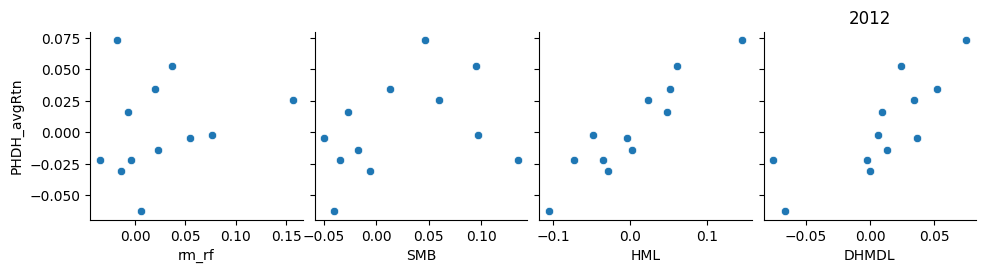

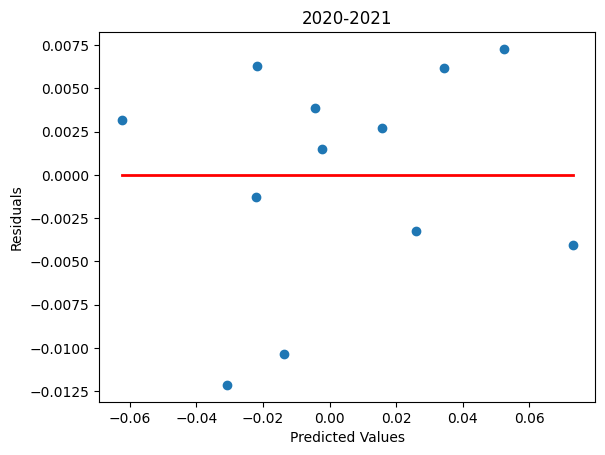

In [1276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# h = all_data[['rm_rf','SMB','HML','DHMDL','PHDH_avgRtn']]
# h2009_2012 = h[(h["Date"] >= "2009-04-30")  & (h["Date"] <="2011-03-31") ]

# h2020_2021.drop(columns='Date', inplace=True)

X = h2012.iloc[:, :-1].values
y = h2012.iloc[:, -1].values

# 상수(intercept) 추가
X = sm.add_constant(X)

# 다중 선형 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 산점도 분석
sns.pairplot(h2012, x_vars=['rm_rf', 'SMB', 'HML', 'DHMDL'], y_vars='PHDH_avgRtn', kind='scatter')
plt.title('2012')
plt.show()

# 잔차 분석
residuals = model.resid
plt.scatter(y, residuals)
plt.plot([min(y), max(y)], [0, 0], color='red', linestyle='-', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("2020-2021")
plt.show()



In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 데이터셋 생성
np.random.seed(0)
X = np.random.rand(100, 2)  # 두 개의 독립변수
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)  # 종속변수

# 상수항 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 잔차 계산
residuals = model.resid

# 잔차 정규성 검정: QQ plot
fig = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

# 잔차 등분산성 검정: 예측값 대 잔차
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# 다중공선성 확인: VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("VIF:", vif)

In [1190]:
all_data[['Date','PHDH_avgRtn']]

,Date,PHDH_avgRtn
0,2007-01-31,-0.030158
1,2007-02-28,-0.054661
2,2007-03-31,0.029142
3,2007-04-30,0.097734
4,2007-05-31,0.069759
...,...,...
187,2022-08-31,0.050720
188,2022-09-30,-0.001733
189,2022-10-31,-0.087331
190,2022-11-30,-0.000967


In [1201]:
all_data.loc[170:191, ['Date', 'PHDH_avgRtn']]

,Date,PHDH_avgRtn
170,2021-03-31,-0.001934
171,2021-04-30,0.098229
172,2021-05-31,0.054844
173,2021-06-30,0.055949
174,2021-07-31,0.016042
175,2021-08-31,-0.031835
176,2021-09-30,-0.029637
177,2021-10-31,-0.042457
178,2021-11-30,0.000170
179,2021-12-31,-0.094668


In [1205]:
all_data_a = all_data.set_index('Date')
all_data_a

,날짜,mkt_rtn,rf,rm_rf,BH_avgRtn,BL_avgRtn,SH_avgRtn,SL_avgRtn,BDH_avgRtn,BDL_avgRtn,SDH_avgRtn,SDL_avgRtn,PHDH_avgRtn,PHDL_avgRtn,PLDH_avgRtn,PLDL_avgRtn,연도,SMB,HML,DHMDL
Date,,,,,,,,,,,,,,,,,,,,
2007-01-31,2007-01-31,-0.051748,0.014141,-0.065889,-0.009333,-0.013218,-0.034468,-0.011113,-0.021936,-0.008696,-0.008496,-0.031541,-0.030158,-0.031937,0.009807,-0.019916,2007.0,-0.034305,-0.031635,-0.010314
2007-02-28,2007-02-28,0.041986,-0.015936,0.057922,-0.072702,-0.046897,-0.035410,-0.043808,-0.051050,-0.052666,-0.053817,-0.032770,-0.054661,-0.033334,-0.051327,-0.042050,2007.0,-0.019418,-0.062759,-0.062150
2007-03-31,2007-03-31,0.024842,-0.014170,0.039012,0.011695,0.038785,0.047344,0.072730,0.031440,0.031816,0.040674,0.065572,0.029142,0.050246,0.049295,0.063154,2007.0,0.094834,0.003281,0.023420
2007-04-30,2007-04-30,0.061747,0.043121,0.018625,0.072345,0.063045,0.083241,0.083787,0.067332,0.064101,0.112350,0.071754,0.097734,0.074987,0.105287,0.064985,2007.0,0.099334,0.082170,0.111754
2007-05-31,2007-05-31,0.102883,0.001969,0.100914,0.162974,0.121004,0.101656,0.062188,0.109713,0.142777,0.055647,0.096584,0.069759,0.125824,0.069005,0.092224,2007.0,0.021855,0.173034,0.045681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,2022-08-31,0.008383,0.126120,-0.117737,0.019775,0.067486,0.063608,0.091663,0.015188,0.058728,0.057080,0.076903,0.050720,0.059240,0.034799,0.096523,2022.0,0.111640,0.003808,0.004452
2022-09-30,2022-09-30,-0.128056,0.034884,-0.162939,0.005676,0.019265,-0.017753,-0.015154,0.005298,0.016348,0.003273,-0.024912,-0.001733,-0.019718,0.019604,-0.008935,2022.0,-0.045377,-0.014133,0.012852
2022-10-31,2022-10-31,0.064078,0.118569,-0.054491,-0.084461,-0.072500,-0.116689,-0.117272,-0.051916,-0.090011,-0.090044,-0.127249,-0.087331,-0.122841,-0.060935,-0.112346,2022.0,-0.155481,-0.106264,-0.033329


In [1292]:
aa = all_data_a.loc[all_data_a.index.year == 2021, 'PHDH_avgRtn'].values
aa

array([ 0.03861709,  0.02069657, -0.00193364,  0.09822922,  0.05484359,
        0.0559489 ,  0.01604231, -0.03183534, -0.02963667, -0.04245663,
        0.00016972, -0.09466769])

In [1283]:
calculate_geometric_mean([0.01395313, 0.04981832, 0.06239843]) * 100 # 2022 345

4.185308620681694

In [1285]:
calculate_geometric_mean([0.09822922, 0.05484359, 0.0559489]) * 100 # 2021 456


6.948489450209938

In [1293]:
aa = all_data_a.loc[all_data_a.index.year == 2021, 'PLDL_avgRtn'].values
aa

array([ 0.08548744,  0.02928412,  0.01853307,  0.03507821,  0.07182956,
        0.07235667,  0.08714842, -0.01841705, -0.00446473, -0.01303463,
       -0.00986518, -0.09769265])

In [1294]:
calculate_geometric_mean([0.03507821, 0.07182956, 0.07235667]) * 100 # 2021 456


5.961000732175736

In [1203]:
calculate_geometric_mean([0.049818, 0.062398, -0.041730])

0.022420896548802638

In [1202]:
0.049818 * 100

4.9818

In [1204]:
0.02242 * 100

2.242

In [1243]:
from scipy.stats import shapiro

# 잔차 계산
residuals = model.resid

# h2008.drop(columns='Date', inplace=True)

X = h2020_2021.iloc[:, :-1].values
y = h2020_2021.iloc[:, -1].values

# 상수(intercept) 추가
X = sm.add_constant(X)

# 다중 선형 회귀 모델 적합
model = sm.OLS(y, X).fit()

# Shapiro-Wilk 검정
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk 검정 통계량:", stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("p-value가 0.05보다 크므로 잔차는 정규성을 충족합니다.")
else:
    print("p-value가 0.05보다 작으므로 잔차는 정규성을 충족하지 않습니다.")

Shapiro-Wilk 검정 통계량: 0.9606619620344022
p-value: 0.45186824132275144
p-value가 0.05보다 크므로 잔차는 정규성을 충족합니다.


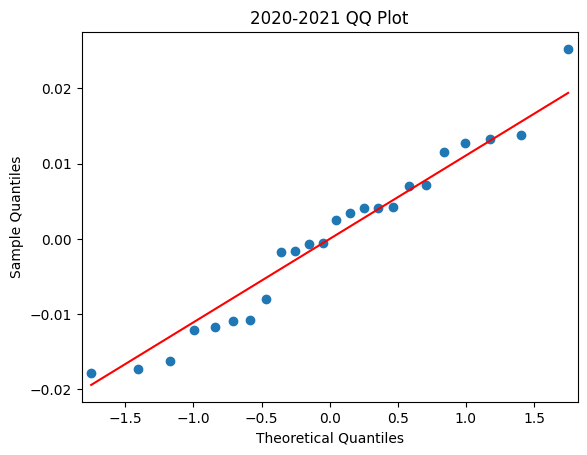

In [1244]:
fig = sm.qqplot(residuals, line='s')
plt.title('2020-2021 QQ Plot')
plt.show()

In [1269]:
import numpy as np
from scipy.stats import levene
import statsmodels.api as sm

X = h2013_2017.iloc[:, :-1].values
y = h2013_2017.iloc[:, -1].values

# 상수항 추가
X = sm.add_constant(X)

# 모델 적합
model = sm.OLS(y, X).fit()

# 잔차 계산
residuals = model.resid

# 독립변수와 종속변수를 이용하여 Levene의 등분산 검정 수행
statistic, p_value = levene(residuals,X[:, 1], X[:, 2], X[:, 3],X[:, 4])

# 결과 출력
print("Levene 통계량:", statistic)
print("p-value:", p_value)

if p_value > 0.05:
    print("p-value가 0.05보다 크므로 등분산성을 충족합니다.")
else:
    print("p-value가 0.05보다 작으므로 등분산성을 충족하지 않습니다.")

Levene 통계량: 17.632206193293555
p-value: 5.458102980016733e-13
p-value가 0.05보다 작으므로 등분산성을 충족하지 않습니다.


In [1265]:
p_value

2.2188615435745557e-13

In [1249]:
X = h2020_2021.iloc[:, :-1].values
X[:, 1]

array([-2.08548048e-01,  2.67810518e-01,  5.20094153e-02, -5.31325023e-02,
        1.01453095e-01, -3.62649307e-02,  5.87830114e-02,  4.72727129e-03,
        8.51902391e-02, -1.47920594e-02, -4.78418680e-04,  4.99066950e-02,
        1.39506261e-01,  1.30277299e-01,  3.67955414e-02,  7.17472561e-02,
       -4.16319005e-02, -3.14761677e-02,  2.06897767e-04,  8.06102465e-03,
       -1.32597841e-01,  1.27991431e-01, -5.70581198e-02,  2.20659502e-02])

In [1250]:
X

array([[ 2.28249818e-01, -2.08548048e-01, -2.69981219e-01,
        -1.35785334e-01],
       [ 2.48546479e-01,  2.67810518e-01,  2.07798493e-01,
         1.73175824e-01],
       [ 4.10886482e-03,  5.20094153e-02,  2.58982802e-02,
         8.52528495e-02],
       [ 1.47902151e-01, -5.31325023e-02, -6.92600190e-02,
         3.53970840e-03],
       [-6.31216330e-02,  1.01453095e-01, -1.04311878e-02,
         1.37968385e-01],
       [ 7.55316441e-02, -3.62649307e-02,  7.11022771e-03,
         1.35702220e-03],
       [-4.40563670e-02,  5.87830114e-02,  4.18589506e-02,
         3.30291434e-03],
       [ 9.00534201e-02,  4.72727129e-03,  5.67270252e-03,
        -2.72125686e-02],
       [ 7.39579232e-02,  8.51902391e-02,  8.53288861e-02,
         5.47236002e-02],
       [ 1.31571141e-01, -1.47920594e-02,  3.05514772e-02,
         4.51414950e-02],
       [ 7.86694396e-03, -4.78418680e-04,  1.15334445e-01,
         1.51270858e-02],
       [-9.17281570e-03,  4.99066950e-02,  2.47991352e-02,
      

In [1268]:
X[:, 1]

array([-0.02434167, -0.02017195, -0.07258831,  0.01972427,  0.02131177,
        0.040423  ,  0.01052961, -0.01756892,  0.00233908, -0.02815806,
        0.02340113, -0.00245661, -0.01124384,  0.0236851 ,  0.02599959,
        0.09740285,  0.02276246,  0.04101173,  0.03270962,  0.04014558,
       -0.06328979,  0.06929266,  0.00090666,  0.16551902,  0.02245964,
        0.03347867,  0.02644507, -0.01564218, -0.03930411,  0.05615068,
        0.00045293, -0.07632897,  0.0056419 ,  0.02338524,  0.0585348 ,
        0.02627904, -0.00152514, -0.02221446,  0.13901931,  0.05269943,
       -0.04351766,  0.01502763, -0.10469804, -0.13704032,  0.04046597,
        0.06626367,  0.03306061,  0.02937252,  0.01888332,  0.06776038,
        0.01345828,  0.02561107, -0.0351721 , -0.02760775, -0.1083401 ,
       -0.03046682, -0.04585513,  0.04811384, -0.04613026, -0.01082085])

In [1255]:
h2020_2021

,rm_rf,SMB,HML,DHMDL,PHDH_avgRtn
159,0.228250,-0.208548,-0.269981,-0.135785,-0.166318
160,0.248546,0.267811,0.207798,0.173176,0.201795
161,0.004109,0.052009,0.025898,0.085253,0.058596
162,0.147902,-0.053133,-0.069260,0.003540,-0.030737
163,-0.063122,0.101453,-0.010431,0.137968,0.065505
164,0.075532,-0.036265,0.007110,0.001357,0.015609
165,-0.044056,0.058783,0.041859,0.003303,0.019494
166,0.090053,0.004727,0.005673,-0.027213,-0.021016
167,0.073958,0.085190,0.085329,0.054724,0.083052
168,0.131571,-0.014792,0.030551,0.045141,0.038617
